<a href="https://colab.research.google.com/github/leodenale/fastquant/blob/master/BRZ/BacktestNewsSentiment4Crypto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# uncomment to install in colab
# !pip install -e git+https://github.com/enzoampil/fastquant.git@master#egg=fastquant
!pip install -e git+https://github.com/leodenale/fastquant.git@master#egg=fastquant

## fetch stock data from yahoo finance and bitcoin from Binance

In [14]:
from fastquant import get_yahoo_data
data = get_yahoo_data("TSLA", "2019-08-11", "2020-08-11")
print(data.head())

from fastquant import get_crypto_data
crypto = get_crypto_data("BTC/USDT", "2019-08-11", "2020-08-11")
print(crypto.head())



[*********************100%***********************]  1 of 1 completed
                  open        high         low       close   adj_close   volume
dt                                                                             
2019-08-12  232.990005  235.770004  228.750000  229.009995  229.009995  4663900
2019-08-13  228.809998  236.000000  227.550003  235.000000  235.000000  4848100
2019-08-14  231.210007  231.500000  216.690002  219.619995  219.619995  9562600
2019-08-15  220.860001  221.559998  211.550003  215.639999  215.639999  8159600
2019-08-16  216.660004  222.240005  216.020004  219.940002  219.940002  5098500
                open      high       low     close        volume
dt                                                              
2019-08-11  11309.24  11600.00  11112.11  11549.97  26772.906910
2019-08-12  11539.08  11577.89  11235.32  11396.08  17568.227075
2019-08-13  11398.35  11456.16  10788.45  10892.71  33234.729680
2019-08-14  10893.36  10897.48   9928.10  1005

## scrape news from business times website and compute sentiment

In [3]:
from fastquant import get_bt_news_sentiment

#scrape the first 3 pages of https://www.businesstimes.com.sg/search/bitcoin?page=1&filter=headline_en
sentiments = get_bt_news_sentiment(keyword="bitcoin", page_nums=3)
sentiments

100%|██████████| 3/3 [01:26<00:00, 28.39s/it]


{datetime.date(2019, 9, 24): 0.953,
 datetime.date(2019, 10, 16): 0.932,
 datetime.date(2019, 10, 27): 0.968,
 datetime.date(2019, 10, 30): 0.603,
 datetime.date(2019, 10, 31): 0.949,
 datetime.date(2019, 11, 5): -0.863,
 datetime.date(2019, 11, 7): 0.77,
 datetime.date(2019, 11, 23): 0.974,
 datetime.date(2019, 11, 24): -0.808,
 datetime.date(2019, 11, 27): -0.565,
 datetime.date(2019, 12, 25): -0.742,
 datetime.date(2020, 1, 2): -0.275,
 datetime.date(2020, 1, 22): -0.331,
 datetime.date(2020, 1, 26): -0.92,
 datetime.date(2020, 1, 31): -0.909,
 datetime.date(2020, 2, 21): -0.315,
 datetime.date(2020, 3, 4): -0.898,
 datetime.date(2020, 4, 26): 0.968,
 datetime.date(2020, 4, 30): -0.772,
 datetime.date(2020, 5, 7): 0.993,
 datetime.date(2020, 5, 9): 0.976,
 datetime.date(2020, 5, 14): 0.958,
 datetime.date(2020, 6, 6): 0.991,
 datetime.date(2020, 6, 7): 0.968,
 datetime.date(2020, 6, 16): 0.37,
 datetime.date(2020, 6, 24): -0.976,
 datetime.date(2020, 7, 1): 0.965,
 datetime.date(202

## run backtest

In [15]:
import matplotlib.pyplot as pl
pl.style.use("default")

Data format detected: ohlcv
Starting Portfolio Value: 100000.00
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
sentiment threshold : 0.2
2019-09-24, BUY CREATE, 8493.14
2019-09-24, Cash: 100000.0
2019-09-24, Price: 8493.14
2019-09-24, Buy prop size: 11
2019-09-24, Afforded size: 11
2019-09-24, Final size: 11
2019-09-25, BUY EXECUTED, Price: 8493.14, Cost: 93424.54, Comm 700.68
2019-11-05, SELL CREATE, 9339.05
2019-11-06, SELL EXECUTED, Price: 9339.05, Cost: 93424.54, Comm 770.47
2019-11-06, OPERATION PROFIT, GROSS 9305.01, NET 7833.85
2019-11-07, BUY CREATE, 9216.20
2019-11-07, Cash: 107833.854325
2019-11-07, Price: 9216.2
2019-11-07, Buy prop size: 11
2019-11-07, Afforded size: 11
2019-11-07, Final size: 11
2019-11-08, BUY EXECUTED, Price: 9216.20, Cost: 101378.20, Comm 760.34
2019-11-24, SELL CREATE, 7109.57
2019-11-25, SELL EXECUTED, Price: 7109.57, Cost: 101378.20, Comm 586.54
2019-11-25, OPERATION PROFI

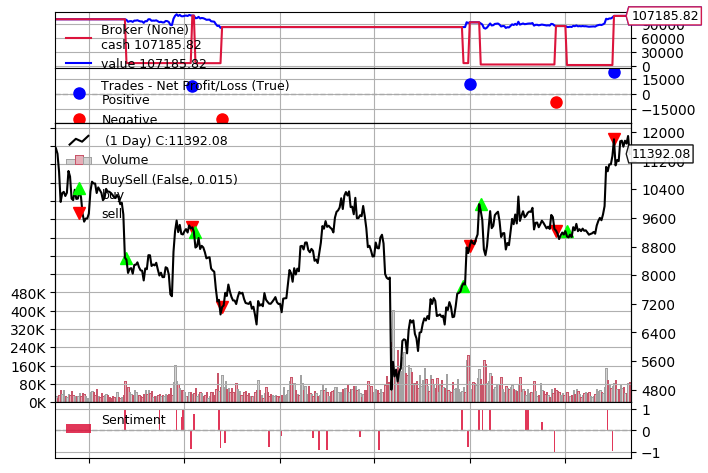

,init_cash,buy_prop,sell_prop,commission,execution_type,senti,rtot,ravg,rnorm,rnorm100,sharperatio,pnl,final_value
0,100000,1,1,0.0075,close,0.2,0.069394,0.000189,0.048803,4.880262,0.21983,7185.82,107185.82225


In [16]:
from fastquant import backtest

#initiate buy/sell if senti>0.2/senti<-0.2
#backtest("sentiment", data, sentiments=sentiments, senti=0.2)
backtest("sentiment", crypto, sentiments=sentiments, senti=0.2)

## run backtest SMAC with a grid of values

In [17]:
from fastquant import backtest

results = backtest('smac', 
                   crypto, 
                   fast_period=[7,14,21,28], 
                   slow_period=[30,45,60,75],
                   plot=False,
                   verbose=False
                  )

Data format detected: ohlcv
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
fast_period : 7
slow_period : 30
Final Portfolio Value: 149961.18192499995
Final PnL: 49961.18
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
fast_period : 7
slow_period : 45
Final Portfolio Value: 136961.59192499996
Final PnL: 36961.59
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
fast_period : 7
slow_period : 60
Final Portfolio Value: 132131.61085000003
Final PnL: 32131.61
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
fast_period : 7
slow_period : 75
Final Portfolio Value: 126606.12560000001
Final PnL: 26606.13
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 

In [18]:
# Check the best final value
results.head()

,init_cash,buy_prop,sell_prop,commission,execution_type,fast_period,slow_period,rtot,ravg,rnorm,rnorm100,sharperatio,pnl,final_value
0,100000,1,1,0.0075,close,7,30,0.405206,0.001104,0.320796,32.079561,0.665449,49961.18,149961.181925
1,100000,1,1,0.0075,close,14,30,0.345305,0.000941,0.267572,26.757167,0.532715,41242.03,141242.030925
2,100000,1,1,0.0075,close,7,45,0.314530,0.000857,0.241067,24.106737,0.589859,36961.59,136961.591925
3,100000,1,1,0.0075,close,14,45,0.295482,0.000805,0.224941,22.494080,0.517683,34377.44,134377.437250
4,100000,1,1,0.0075,close,7,60,0.278628,0.000759,0.210846,21.084650,0.598946,32131.61,132131.610850


That's a 49% maximum profit using *SMAC*!

In [19]:
#get best parameters on top row 
fast_best, slow_best = results.iloc[0][["fast_period","slow_period"]]
fast_best, slow_best

(7, 30)

##run backtest using optimum values

Data format detected: ohlcv
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
fast_period : 7
slow_period : 30
Final Portfolio Value: 149961.18192499995
Final PnL: 49961.18
Time used (seconds): 0.09811711311340332
Optimal parameters: {'init_cash': 100000, 'buy_prop': 1, 'sell_prop': 1, 'commission': 0.0075, 'execution_type': 'close', 'fast_period': 7, 'slow_period': 30}
Optimal metrics: {'rtot': 0.4052062874503205, 'ravg': 0.0011041043254777126, 'rnorm': 0.3207956101919274, 'rnorm100': 32.079561019192745, 'sharperatio': 0.6654486883952886, 'pnl': 49961.18, 'final_value': 149961.18192499995}


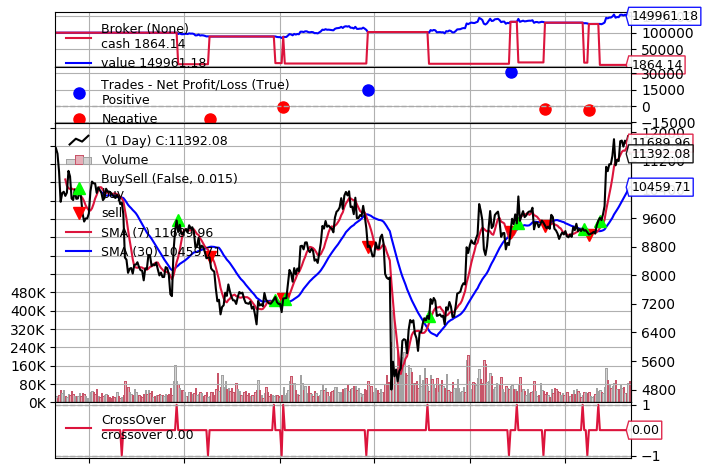

In [20]:
results = backtest('smac', 
                   crypto, 
                   fast_period=fast_best, 
                   slow_period=slow_best,
                   plot=True,
                   verbose=False
                  )